In [ ]:
%pip install --upgrade pip
%pip install python2verilog[full]

x: 15, y: 19, radius: 3


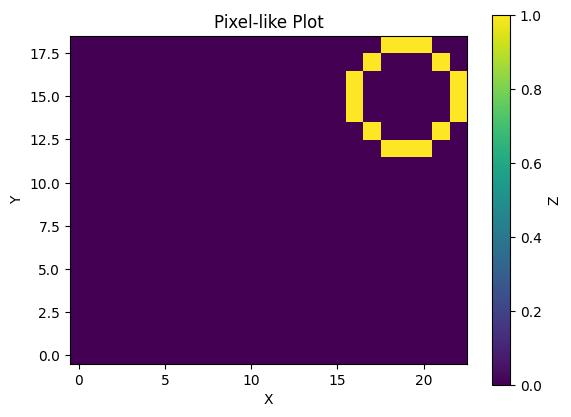

x: 11, y: 29, radius: 8


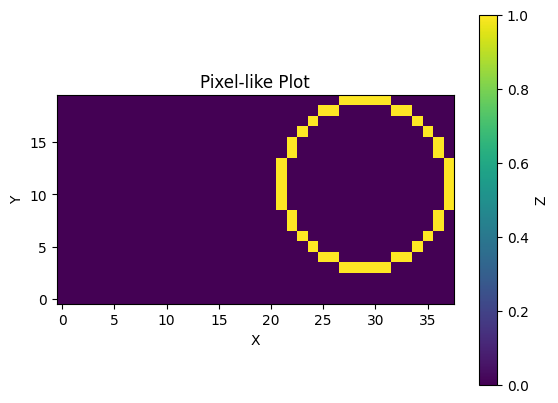

x: 28, y: 10, radius: 5


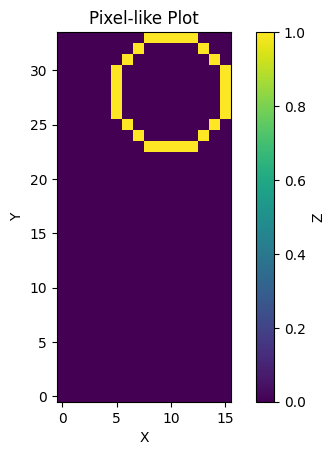

AttributeError: 'Context' object has no attribute 'values'

Error in callback <function __exit_register.<locals>.callback at 0x7f910319d2d0> (for post_execute):


FileNotFoundError: [Errno 2] No such file or directory: '/tmp/ipykernel_301138/606643915.sv'

In [1]:
import random
from python2verilog import verilogify, namespace_to_verilog, get_context
from python2verilog.utils import make_visual


@verilogify
def draw_circle(centre_x, centre_y, radius):
    offset_y = 0
    offset_x = radius
    crit = 1 - radius
    while offset_y <= offset_x:
        yield (centre_x + offset_x, centre_y + offset_y)  # -- octant 1
        yield (centre_x + offset_y, centre_y + offset_x)  # -- octant 2
        yield (centre_x - offset_x, centre_y + offset_y)  # -- octant 4
        yield (centre_x - offset_y, centre_y + offset_x)  # -- octant 3
        yield (centre_x - offset_x, centre_y - offset_y)  # -- octant 5
        yield (centre_x - offset_y, centre_y - offset_x)  # -- octant 6
        yield (centre_x + offset_x, centre_y - offset_y)  # -- octant 8
        yield (centre_x + offset_y, centre_y - offset_x)  # -- octant 7
        offset_y = offset_y + 1
        if crit <= 0:
            crit = crit + 2 * offset_y + 1
        else:
            offset_x = offset_x - 1
            crit = crit + 2 * (offset_y - offset_x) + 1


for _ in range(3):
    x, y, radius = random.randint(10, 30), random.randint(10, 30), random.randint(1, 10)
    print(f"x: {x}, y: {y}, radius: {radius}")
    make_visual(draw_circle(x, y, radius))

module, testbench = namespace_to_verilog(get_context(draw_circle).namespace)

print(module)
print(testbench)